# The most frequent combinations of fragments in COCONUT dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import csv

from ast import literal_eval
import re
import sys
sys.path.insert(0,"./../fip3")
from fip import profiles

## Dataset prep

### Making feature pointwise mutual information profiles

In [3]:
profile = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp_386297.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=386297)
profile.df

value
feature1 feature2       
0        0          3426
         1          1169
         10          153
         100          51
         1000         46
...                  ...
997      998           7
         999          18
998      998        3208
         999          96
999      999        7175

[2096060 rows x 1 columns]

In [4]:
probability_profile = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(profile)
probability_profile.df

value
feature1 feature2          
0        0         0.008869
         1         0.003026
         10        0.000396
         100       0.000132
         1000      0.000119
...                     ...
997      998       0.000018
         999       0.000047
998      998       0.008304
         999       0.000249
999      999       0.018574

[2096060 rows x 1 columns]

In [5]:
pmi_profile = profiles.PointwiseMutualInformationProfile.from_cooccurrence_probability_profile(probability_profile)
pmi_profile

In [6]:
reference_profile = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp_379012.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=379012)
reference_profile.df

value
feature1 feature2       
0        0           814
         1           158
         10            6
         1000          4
         1001          3
...                  ...
997      998          16
         999          44
998      998        2788
         999          63
999      999        4474

[2077720 rows x 1 columns]

In [7]:
reference_probability_profile = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(reference_profile)
reference_probability_profile.df

value
feature1 feature2          
0        0         0.002148
         1         0.000417
         10        0.000016
         1000      0.000011
         1001      0.000008
...                     ...
997      998       0.000042
         999       0.000116
998      998       0.007356
         999       0.000166
999      999       0.011804

[2077720 rows x 1 columns]

In [8]:
reference_pmi_profile = profiles.PointwiseMutualInformationProfile.from_cooccurrence_probability_profile(reference_probability_profile)
reference_pmi_profile

### Making feature pointwise KL divergence profile between COCONUT and ZINC

In [9]:
difference_pkld_profile = profiles.PointwiseKLDivergenceProfile.from_cooccurrence_probability_profiles(
    probability_profile, reference_probability_profile)
difference_pkld_profile.df

value
feature1 feature2          
0        0         2.045958
         1         2.859812
         10        4.644958
         100       5.644962
         1000      3.496095
...                     ...
928      972      -0.027471
939      986      -1.027471
959      995      -0.027471
968      990      -3.834826
969      995      -0.027471

[2098061 rows x 1 columns]

In [10]:
difference_pkld_profile.df

value
feature1 feature2          
0        0         2.045958
         1         2.859812
         10        4.644958
         100       5.644962
         1000      3.496095
...                     ...
928      972      -0.027471
939      986      -1.027471
959      995      -0.027471
968      990      -3.834826
969      995      -0.027471

[2098061 rows x 1 columns]

In [11]:
difference_pkld_profile.df[difference_pkld_profile.df['value'] > 10]

value
feature1 feature2           
10       1660      10.550906
         478       10.139638
         644       10.059996
1029     141       10.096654
1037     1474      10.352994
1218     414       10.069252
1289     1660      10.078442
1304     1600      10.049352
1360     414       10.529039
         775       10.504889
1361     478       10.478345
1364     1419      10.799876
1373     1690      10.257935
1467     1690      10.026463
1474     478       10.172209
         610       10.572446
         722       10.725754
         869       10.684204
1502     1881      10.056012
1558     414       10.232280
16       1841      10.105675
1660     418       11.278595
1747     416       10.031878
1755     874       10.517497
347      478       10.134924
414      579       10.415477
         775       10.346486
416      858       10.112084
478      515       10.315723
         746       10.224015
         941       10.439119
483      574       10.203154
568      775       10.259091
579      775       10.269449
644      7         10.157408
669      904       10.515569
677      874       10.518463

### Most frequent combinations of fragments

In [12]:
difference_pkld_profile.df.nlargest(50,"value")

value
feature1 feature2           
1660     418       11.278595
1364     1419      10.799876
1474     722       10.725754
         869       10.684204
         610       10.572446
10       1660      10.550906
1360     414       10.529039
677      874       10.518463
1755     874       10.517497
669      904       10.515569
1360     775       10.504889
1361     478       10.478345
478      941       10.439119
414      579       10.415477
1037     1474      10.352994
414      775       10.346486
478      515       10.315723
579      775       10.269449
568      775       10.259091
1373     1690      10.257935
1558     414       10.232280
478      746       10.224015
483      574       10.203154
1474     478       10.172209
644      7         10.157408
10       478       10.139638
347      478       10.134924
416      858       10.112084
16       1841      10.105675
1029     141       10.096654
1289     1660      10.078442
1218     414       10.069252
10       644       10.059996
1502     1881      10.056012
1304     1600      10.049352
1747     416       10.031878
1467     1690      10.026463
1600     7          9.979560
1332     941        9.964055
1296     1557       9.962641
418      443        9.961218
1475     858        9.923089
1540     478        9.913581
1306     1502       9.912112
478      633        9.912112
1381     1772       9.904748
208      418        9.877920
574      904        9.874912
1944     871        9.871890
1656     574        9.870379

### Looking at the bits

In [3]:
coco = pd.read_csv('../data/CP1/COCONUT/COCOrandom.csv', delimiter = ' ')
coco

,Coconut_id,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset
0,CNP0239046,CCCCCC1C(=O)CCC1CC(=O)OC,226.156895,2.72510,KVWWIYGFBYDJQC-UHFFFAOYSA-N,KVWWIYGFBYDJQC,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 142, 195, 226, 294, 314, 334, 339, 370, 5..."
1,CNP0205086,Cc1c2c(cc3c1oc(=O)c1ccccc13)CN(c1cccc(Cl)c1)CO2,377.081871,5.26452,DWNKYEMDZRSBHK-UHFFFAOYSA-N,DWNKYEMDZRSBHK,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[133, 137, 165, 216, 252, 314, 350, 382, 398, ..."
2,CNP0361840,COc1cc(C2CC(=O)Oc3ccc4c(=O)c(-c5ccccc5)coc4c32...,458.136553,4.92680,ZRAWZNDFONIPGO-UHFFFAOYSA-N,ZRAWZNDFONIPGO,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[45, 60, 133, 145, 222, 227, 231, 249, 282, 28..."
3,CNP0264800,C=C1C(=O)OC2C=C(CO)CCC(OCC)C3=CC(OC3=O)C12,320.125988,1.05360,PTJPAEBQCZMNAV-UHFFFAOYSA-N,PTJPAEBQCZMNAV,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[35, 80, 176, 222, 294, 314, 408, 514, 650, 65..."
4,CNP0396333,CC(=O)C(CC=C(C)C)C(C)=CCOc1ccc(CCNC(=O)c2ccccc...,419.246044,5.54570,FGXBFPFGWRVMGG-UHFFFAOYSA-N,FGXBFPFGWRVMGG,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 8, 80, 102, 197, 265, 310, 322, 367, 389, ..."
...,...,...,...,...,...,...,...,...,...
386292,CNP0315857,COC(=O)C1=COC(OC2OC(COC(=O)c3ccc(O)c(OC)c3)C(O...,554.163556,-0.63720,LIVSNGMPJUCRLO-UHFFFAOYSA-N,LIVSNGMPJUCRLO,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[58, 80, 145, 147, 167, 231, 233, 249, 314, 42..."
386293,CNP0032553,Cc1c(CCC(=O)NCC(=O)NCC(=O)[O-])c(=O)oc2cc(O)c(...,395.065152,-0.62468,SSZVGMXOKPZNCV-UHFFFAOYSA-M,SSZVGMXOKPZNCV,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[41, 80, 197, 252, 254, 305, 314, 366, 406, 42..."
386294,CNP0223192,CC(=O)Oc1c(C)cc2c(c1O)C(=O)C(C1=CC(=O)c3cc(C)c...,490.089997,2.87624,JODPOMYHTFZNTK-UHFFFAOYSA-N,JODPOMYHTFZNTK,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[16, 39, 84, 202, 224, 314, 333, 352, 516, 641..."
386295,CNP0356727,C[N+]([O-])=NCOC1OC(CO)C(O)C(OC2OC(COC3OC(CO)C...,576.201398,-6.99890,STHHNNUYQQUJGY-UHFFFAOYSA-N,STHHNNUYQQUJGY,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[77, 80, 170, 222, 349, 443, 489, 588, 610, 65..."


In [4]:
def substructures_of_bit_ecfp4_2024(mol, bit):
    bitinfo = {}
    Chem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2024, bitInfo=bitinfo)
    hit_atoms = [Chem.FindAtomEnvironmentOfRadiusN(mol, radius, atom)
                 for atom, radius in bitinfo.get(bit, [])
                 if radius > 0]
    submols = [Chem.PathToSubmol(mol, ha) for ha in hit_atoms]
    return submols

In [5]:
smiles_db = []
for x in coco['Smiles']:
    mol = Chem.MolFromSmiles(x)
    smiles_db.append(mol)

### Bit 418

In [6]:
substructure_smiles = {}
for ligand in smiles_db:
    for submol in substructures_of_bit_ecfp4_2024(ligand, 418):
        subsmiles = Chem.MolToSmiles(submol)
        substructure_smiles[subsmiles] = substructure_smiles.get(subsmiles, 0) + 1
substructure_smiles

{'CC': 289329,
 'CCC(CC)(CC)CC': 481,
 'cc(C)cc(C)[nH]': 41,
 'ccc(c(c)N)C(c)(C)c': 1,
 'cc(c)OCC': 222,
 'COC': 139,
 'cc(C)cc(c)C': 33,
 'CC(C)=CC(C)(O)O': 22,
 'cc(C)cc([nH+])N': 333,
 'ccc(-c(c)c)c(n)=O': 111,
 'C=NCCC': 106,
 'CSCC(C)N': 20,
 'c=c(c)[nH]on': 1,
 'COCCN': 385,
 'CC(C)OC(C)O': 9,
 'CCC(OC)C(C)O': 69,
 'ccc(cc)NN': 46,
 'cc(c)N(CC)C(C)=O': 86,
 'CC=C(C)C(C)C': 94,
 'cc(c)C(O)CO': 5,
 'ccc(c(c)O)C(C)c': 137,
 'CN=C(O)C(C)C': 8,
 'ccc(sc)c(c)c': 83,
 'C=CC(C(=C)C)C(C)(C)C': 2,
 'CCC(CN)C(=O)O': 18,
 'C=CC(=C(C)C)C(C)C': 1,
 'C=C(C)OC(C)O': 6,
 'CCC(C)(CC)C(=O)O': 49,
 'C=C(C)C(C(C)C)C(C)(O)O': 44,
 'cc(c)C(CC)(CC)C(C)C': 3,
 'cc(O)c(c(c)o)C(C)C': 8,
 'ccc(c[nH])C(C)C': 153,
 'CN(C)C': 16,
 'CC(C)C(O)(C(C)C)C(C)C': 2,
 'CC(C)(C)C': 160,
 'coc(c(c)=O)c(c)o': 96,
 'cc(c)C(=O)C(C)(C)S': 1,
 'CC(=O)C(C)=O': 1,
 'CCCC(C)(C)N': 24,
 'COC(C(C)O)C(C)(O)O': 9,
 'CN(C)C(=O)CN': 54,
 'COC(OC)C(C)(C)C': 19,
 'CC(C)C(C)(CO)C(C)N': 10,
 'COC(=O)C(c)(C)O': 2,
 'cnc(NC)n(c)C': 9,
 'CCC

### Bit 1660

In [7]:
substructure_smiles = {}
for ligand in smiles_db:
    for submol in substructures_of_bit_ecfp4_2024(ligand, 1660):
        subsmiles = Chem.MolToSmiles(submol)
        substructure_smiles[subsmiles] = substructure_smiles.get(subsmiles, 0) + 1
substructure_smiles

{'CCCC(C)C': 722,
 'CCC(O)C(C)O': 805,
 'CCC(C)C': 5173,
 'CCNC(C)C': 33,
 'CC(=O)C=C(C)C': 416,
 'CC(C)(C)C': 409,
 'CC(N)C(O)C(C)O': 124,
 'CCCC(c)C': 334,
 'ccc(oc)C(N)=O': 151,
 'cc(c)CSS': 384,
 'CC(=O)OC(C)C': 861,
 'C=CC(OC)C(C)C': 146,
 'CC=COC': 33,
 'cC1CC1': 107,
 'C=C(C)C(=O)NC': 165,
 'CCCC(C)c': 351,
 'CC(C)C(O)CS': 114,
 'CC(C)(C)O': 20,
 'CC1CC(C)(C)C1C(C)(C)C': 3,
 'C=C(c)C(=O)NC': 5,
 'ccc(Cc)oc': 52,
 'CC(C)=CC(C)(C)C': 35,
 'CCC(O)(OC)C(C)(C)O': 1,
 'C=CC(C(C)=O)=C(C)O': 16,
 'cC(C)c(c(n)N)c([nH])=O': 38,
 'CCC(C(C)(C)C)C(C)(N)N': 4,
 'cc(O)c(Oc)c(c)O': 28,
 'C=C(C)C[S+](C)[O-]': 2,
 'COC(=O)C(c)O': 35,
 'cnn(C)c(c)C': 66,
 'C=C(C)C(C)(C(C)(C)C)C(C)(C)C': 6,
 'COC(C(C)O)C(C)(C)C': 57,
 'ccc(cc)C(C)N': 68,
 'CC(C)(O)C1OC1(C)C': 13,
 'C=C(c)C(=O)Nc': 75,
 'C=Nc(cc)c(c)C': 1,
 'CC(C)C(O)C(C)O': 29,
 'cc(c)C(C(=N)O)=C(C)O': 1,
 'CCC(C(=O)O)=C(C)C': 6,
 'CCC(CC)(CC)NC': 10,
 'C=C(C)C=Cc': 5,
 'CCC(O)C(C)C': 1,
 'CC(=O)NC(C)c': 36,
 'CCC(C(C)C)C(C)(C)C': 5,
 'cc(o)C(=O)N(

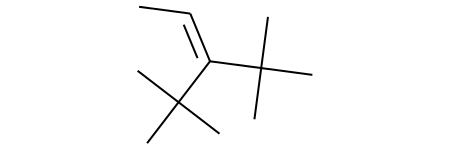

In [8]:
Chem.MolFromSmiles('CC=C(C(C)(C)C)C(C)(C)C')

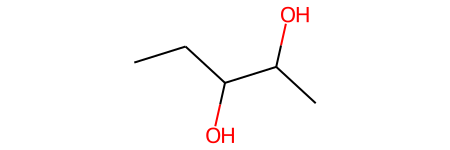

In [9]:
Chem.MolFromSmiles('CCC(O)C(C)O')

## Bit 1364

In [10]:
substructure_smiles = {}
for ligand in smiles_db:
    for submol in substructures_of_bit_ecfp4_2024(ligand, 1364):
        subsmiles = Chem.MolToSmiles(submol)
        substructure_smiles[subsmiles] = substructure_smiles.get(subsmiles, 0) + 1
substructure_smiles

{'CC(C)O': 15964,
 'CC(=O)NC(C)C': 287,
 'cc(O)c(OC)c(c)O': 594,
 'cOC(CO)Oc': 96,
 'CCCC(C)N': 160,
 'CC(=O)OC(C)C': 535,
 'cCCCN': 396,
 'C=CC(C)c(c)c': 148,
 'C=C(C)CO': 149,
 'C=C(C)C(CC)CC': 113,
 'CC(C)C(C(C)C)(C(C)O)C(C)(C)O': 91,
 'COC(=O)C(C)(C)C': 12,
 'ccc(c(c)n)n(c)c': 3,
 'CC(=O)NC(C)N': 22,
 'C=Cc(c[n+])c(c)N': 19,
 'cnc(-c(c)o)c(n)N': 2,
 'CS(=O)(=O)CCN': 103,
 'CCC(C(C)N)C(C)O': 45,
 'cc(c)C(OC)C(C)(C)C': 22,
 'C=CC(C=C)C(C)(C)C': 10,
 'CC(C)=CC(C)O': 4,
 'CC(O)CC(O)O': 15,
 'CNC(C)C': 25,
 'CC(O)C(C(C)(C)C)C(C)(C)C': 17,
 'cnc(c(C)n)C(C)(C)C': 14,
 'C=C(c)OC(C)(C)c': 4,
 'cnc(NC)c(c)N': 2,
 'C=C(C)C(O)(CC)C(C)O': 22,
 'C=C(C)Cl': 14,
 'CC(c)C(C(=O)O)C(C)C': 2,
 'C#CC(CC)C(C)C': 20,
 'CCC(=O)C(C)(C)C': 1,
 'N=c(n)ccn': 5,
 'cC(c)NN': 1,
 'cCC(=O)C(=O)[O-]': 3,
 'cc(C)c[n+](c)C': 10,
 'COCC(C)(C)C': 2,
 'CC(=O)C(C(C)C)(C(C)C)C(O)O': 1,
 'c[c-](C)c(=O)[n+](c)O': 1,
 'CCC(CC)(C(=O)O)C(C)(C)O': 11,
 'CC(C)CC(N)=O': 1,
 'C=C(C)C(C)(C(C)C)C(C)(C)C': 4,
 'CC=CC(C)[NH3+]': 1,
 

##  Bit 1419

In [11]:
substructure_smiles = {}
for ligand in smiles_db:
    for submol in substructures_of_bit_ecfp4_2024(ligand, 1419):
        subsmiles = Chem.MolToSmiles(submol)
        substructure_smiles[subsmiles] = substructure_smiles.get(subsmiles, 0) + 1
substructure_smiles

{'CCC(O)C(C)N': 30,
 'CCC(C(C)=O)C(C)(C)C': 9,
 'CCOC(C)=O': 225,
 'CCC(OC)C(C)(C)O': 5,
 'CC(N)(O)C(O)C(O)O': 17,
 'CC(c)C': 95,
 'CCC(C(C)C)C(C)(C)C': 269,
 'CC(C)C': 185,
 'CCC(Oc)C(=O)O': 7,
 'CC(C)(C)O': 52,
 'CC=CC(C)O': 63,
 'C=C(C)CC(=O)O': 100,
 'cCC(C(C)c)C(C)(C)C': 14,
 'cC(C)C': 154,
 'CCC(C(C)(C)C)C(C)(C)O': 1,
 'CCNC(C)(C)C': 3,
 'C=C(C)C(O)C(C)O': 4,
 'cCCSC': 4,
 'C=NC(CC)CO': 1,
 'C=CC(C(C)=O)C(C)C': 2,
 'CC=CC(C)(C)C': 50,
 'CC(C)(O)CC(N)=O': 22,
 'C=CC(C(C)C)C(C)(C)c': 27,
 'CC(C)c': 17,
 'ccc(cc)C(C)(C)C': 4,
 'CC(C)C#N': 5,
 'CC(C)(O)C=O': 3,
 'C=C(C)c(cc)c(c)C': 9,
 'CCC#[N+][O-]': 2,
 'CC(N)C=CS': 20,
 'c[o+]c(c(c)C)c(c)c': 19,
 'COC(C)(C)O': 12,
 'cC(O)CO[N+]': 2,
 'CC(N)C(O)N(C)C': 17,
 'CC(C)CC(C)(O)O': 23,
 'ccnc(-c)n': 20,
 'cnc(nc)NC': 27,
 'cc(O)c(c(c)O)c(c)c': 11,
 'CC(=O)OC(C)(C)C': 20,
 'cc(C)c(=O)c(c)C': 2,
 'CC(C)CC(C)(C)O': 16,
 'cc(C)c(c(c)C)C(C)c': 2,
 'CCNC(C)C': 4,
 'COC(C(C)O)C(C)(C)O': 4,
 'CCC(C)(C(C)C)C(C)(C)O': 6,
 'CNC(=C(C)Cl)C(C)(O)O': 4,

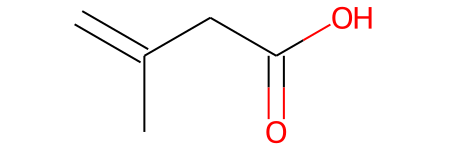

In [12]:
Chem.MolFromSmiles('C=C(C)CC(=O)O')